<a href="https://colab.research.google.com/github/Devanaa1999/NeuralNetwork/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Devanaa1999/NeuralNetwork/

Cloning into 'NeuralNetwork'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 8), reused 11 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 38.46 MiB | 30.43 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
!git clone https://github.com/nuradilahf/feature-extraction

Cloning into 'feature-extraction'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), 1.01 MiB | 5.34 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
import pandas as pd

# Membaca file train.csv dan valid.csv
df_train = pd.read_csv('/content/feature-extraction/clean.csv')
df_valid = pd.read_csv('/content/feature-extraction/train_data.csv')

# Menggabungkan df_train dan df_valid menggunakan pd.concat
df = pd.concat([df_train, df_valid], ignore_index=True)

# Membaca file test.csv
df_test = pd.read_csv('/content/feature-extraction/test_data.csv')

# Menggabungkan df dengan df_test menggunakan pd.concat
df = pd.concat([df, df_test], ignore_index=True)

In [4]:
df.head()

,Unnamed: 0,Text,Text_Bersih,Sentiment,0,1,2
0,0.0,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,NaN,NaN,NaN
1,1.0,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah pak ai...,neutral,NaN,NaN,NaN
2,2.0,lokasi strategis di jalan sumatera bandung . t...,lokasi strategis di jalan sumatra bandung temp...,positive,NaN,NaN,NaN
3,3.0,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,positive,NaN,NaN,NaN
4,4.0,duh . jadi mahasiswa jangan sombong dong . kas...,aduh jadi mahasiswa jangan sombong dong kasih ...,negative,NaN,NaN,NaN


In [5]:
df.shape

(32799, 7)

In [6]:
df.Sentiment.value_counts()

,count
Sentiment,
positive,15038
negative,7995
neutral,2700


In [7]:
import re

def cleansing(sent):
    # Check if sent is a string before applying lower()
    if isinstance(sent, str):
        # Mengubah seluruh teks menjadi huruf kecil
        string = sent.lower()
        # Menghapus karakter selain huruf dan angka, menggantinya dengan spasi
        string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
        return string
    else:
        # Handle non-string values, e.g., return an empty string or NaN
        return ''  # Or return float('nan') to keep track of missing values

df['text_clean'] = df['Text_Bersih'].apply(cleansing)

In [8]:
df.head()

,Unnamed: 0,Text,Text_Bersih,Sentiment,0,1,2,text_clean
0,0.0,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,NaN,NaN,NaN,warung ini dimiliki oleh pengusaha pabrik tahu...
1,1.0,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah pak ai...,neutral,NaN,NaN,NaN,mohon ulama lurus dan k212 mmbri hujjah pak ai...
2,2.0,lokasi strategis di jalan sumatera bandung . t...,lokasi strategis di jalan sumatra bandung temp...,positive,NaN,NaN,NaN,lokasi strategis di jalan sumatra bandung temp...
3,3.0,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,positive,NaN,NaN,NaN,betapa bahagia nya diri ini saat unboxing pake...
4,4.0,duh . jadi mahasiswa jangan sombong dong . kas...,aduh jadi mahasiswa jangan sombong dong kasih ...,negative,NaN,NaN,NaN,aduh jadi mahasiswa jangan sombong dong kasih ...


In [9]:
# Assuming your target variable column is named 'Sentiment', change the code to:
neg_label = df.loc[df['Sentiment'] == 'negative'].Sentiment.tolist()
neu_label = df.loc[df['Sentiment'] == 'neutral'].Sentiment.tolist()
pos_label = df.loc[df['Sentiment'] == 'positive'].Sentiment.tolist()

# The following lines are incorrect as 'target_variable' column doesn't exist
# Remove or comment them out
#neg_label = df.loc[df['Sentiment'] == 'negative'].target_variable.tolist()
#neu_label = df.loc[df['Sentiment'] == 'neutral'].target_variable.tolist()
#pos_label = df.loc[df['Sentiment'] == 'positive'].target_variable.tolist()

In [10]:
# Assuming you have the pos_label, neu_label, and neg_label lists from previous cells
pos = len(pos_label)  # Assign the length of pos_label to pos
neu = len(neu_label)  # Assign the length of neu_label to neu
neg = len(neg_label)  # Assign the length of neg_label to neg

total_data = pos + neu + neg  # Calculate total data
labels = pos_label + neu_label + neg_label  # Combine labels

print("Pos: %s, Neu: %s, Neg: %s" % (len(pos_label), len(neu_label), len(neg_label)))  # Print label counts
print("Total data: %s" % total_data)  # Print total data count directly, without using len()

Pos: 15038, Neu: 2700, Neg: 7995
Total data: 25733


In [11]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
# The problem was here: you were passing total_data (an integer)
# instead of the actual text data.
# df['text_clean'] contains the cleaned text data.
tokenizer.fit_on_texts(df['text_clean'])

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("tokenizer.pickle has created!")

# Now, you need to transform the text data into sequences
X = tokenizer.texts_to_sequences(df['text_clean'])
vocab_size = len(tokenizer.word_index)
maxlen = max(len(x) for x in X)

X = pad_sequences(X)
with open('x_pad_sequences.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("x_pad_sequences.pickle has created!")

tokenizer.pickle has created!
x_pad_sequences.pickle has created!


In [12]:
Y = pd.get_dummies(labels)
Y = Y.values

with open('y_labels.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("y_labels.pickle has created!")


y_labels.pickle has created!


In [13]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

# Load X data
file = open("x_pad_sequences.pickle", 'rb')
X = pickle.load(file)
file.close()

# Load Y data
file = open("y_labels.pickle", 'rb')
Y = pickle.load(file)
file.close()

# Ensure X and Y have the same number of samples before splitting
min_samples = min(X.shape[0], Y.shape[0])
X = X[:min_samples]
Y = Y[:min_samples]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [14]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN #
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K


In [15]:
embed_dim = 100
units = 64

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(SimpleRNN(units, dropout=0.2))
model.add(Dense(3, activation='softmax'))

# Use 'learning_rate' instead of 'lr'
adam = optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2059/2059 ━━━━━━━━━━━━━━━━━━━━ 372s 179ms/step - accuracy: 0.7164 - loss: 0.6297 - val_accuracy: 0.7379 - val_loss: 0.5721
Epoch 2/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 385s 181ms/step - accuracy: 0.7287 - loss: 0.5885 - val_accuracy: 0.7379 - val_loss: 0.5794
Epoch 2: early stopping


In [16]:
from sklearn import metrics

predictions = model.predict(X_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)


161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1578
           1       0.00      0.00      0.00       534
           2       1.00      0.73      0.84      3035

    accuracy                           0.74      5147
   macro avg       0.51      0.58      0.52      5147
weighted avg       0.75      0.74      0.71      5147



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)

accuracies = []

y = Y

embed_dim = 100
units = 64


In [19]:
for iteration, data in enumerate(kf.split(X), start=1):
    data_train = X[data[0]]
    target_train = y[data[0]]

    data_test = X[data[1]]
    target_test = y[data[1]]

    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(SimpleRNN(units, dropout=0.2))
    model.add(Dense(3, activation='softmax'))

    # Change 'lr' to 'learning_rate'
    adam = optimizers.Adam(learning_rate=0.001)
    # Remove this line as it's redundant and uses the incorrect 'lr'
    # sgd = optimizers.Adam(lr=0.001)

    # Use the same optimizer for both compile calls
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']) # You might need to change this loss to 'categorical_crossentropy' if your target is one-hot encoded
    #model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) # This line is now redundant

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    history = model.fit(data_train, target_train, epochs=10, batch_size=10, validation_data=(data_test, target_test), verbose=1, callbacks=[es])

    predictions = model.predict(data_test)
    y_pred = predictions

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 377s 181ms/step - accuracy: 0.7036 - loss: 0.3867 - val_accuracy: 0.7397 - val_loss: 0.3384
Epoch 2/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 371s 180ms/step - accuracy: 0.7352 - loss: 0.3415 - val_accuracy: 0.7397 - val_loss: 0.3344
Epoch 3/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 384s 181ms/step - accuracy: 0.7324 - loss: 0.3432 - val_accuracy: 0.7397 - val_loss: 0.3349
Epoch 3: early stopping
161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
Epoch 1/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 370s 178ms/step - accuracy: 0.7110 - loss: 0.3698 - val_accuracy: 0.7340 - val_loss: 0.3394
Epoch 2/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 367s 178ms/step - accuracy: 0.7351 - loss: 0.3413 - val_accuracy: 0.7340 - val_loss: 0.3390
Epoch 3/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 383s 179ms/step - accuracy: 0.7344 - loss: 0.3412 - val_accuracy: 0.7340 - val_loss: 0.3393
Epoch 3: early stopping
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Epoch 1/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 375s 181ms/step - accur

In [21]:
for iteration, data in enumerate(kf.split(X), start=1):
    data_train = X[data[0]]
    target_train = y[data[0]]

    data_test = X[data[1]]
    target_test = y[data[1]]

    # ... (your model training code) ...

    predictions = model.predict(data_test)
    y_pred = predictions

    # Use target_test instead of y_test for accuracy calculation
    accuracy = accuracy_score(target_test.argmax(axis=1), y_pred.argmax(axis=1))

    print("Training ke-", iteration)
    # Use target_test instead of y_test for classification report
    print(classification_report(target_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print("=============================================")

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Training ke- 1
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1600
           1       0.00      0.00      0.00       539
           2       1.00      0.73      0.85      3008

    accuracy                           0.74      5147
   macro avg       0.51      0.58      0.52      5147
weighted avg       0.75      0.74      0.71      5147

  7/161 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Training ke- 2
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1604
           1       0.00      0.00      0.00       525
           2       1.00      0.72      0.84      3018

    accuracy                           0.73      5147
   macro avg       0.51      0.57      0.51      5147
weighted avg       0.75      0.73      0.71      5147

  7/161 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Training ke- 3
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1569
           1       0.00      0.00      0.00       539
           2       1.00      0.72      0.84      3039

    accuracy                           0.73      5147
   macro avg       0.51      0.57      0.51      5147
weighted avg       0.75      0.73      0.71      5147

 11/161 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
Training ke- 4
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1549
           1       0.00      0.00      0.00       571
           2       1.00      0.73      0.85      3026

    accuracy                           0.73      5146
   macro avg       0.51      0.58      0.51      5146
weighted avg       0.75      0.73      0.71      5146

  1/161 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Training ke- 5
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      1673
           1       0.00      0.00      0.00       526
           2       1.00      0.72      0.84      2947

    accuracy                           0.74      5146
   macro avg       0.52      0.57      0.52      5146
weighted avg       0.75      0.74      0.71      5146




Rata-rata Accuracy:  0.735359294117878


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

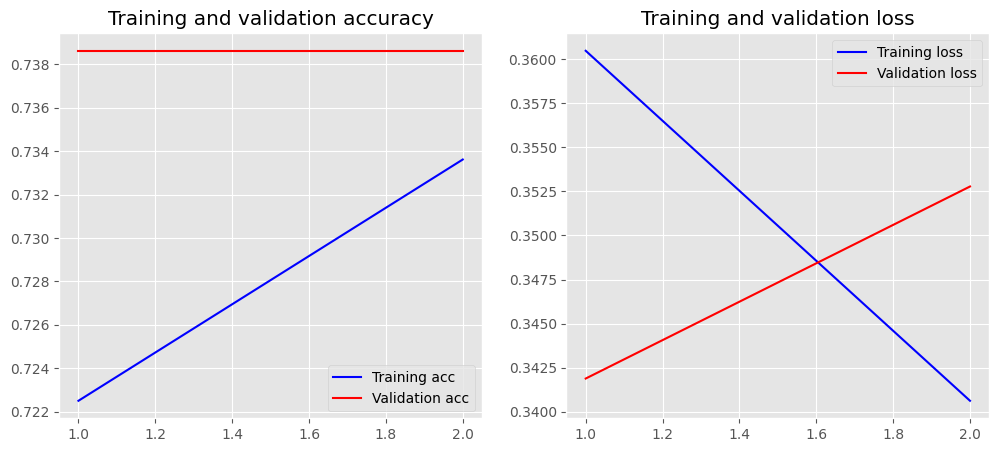

In [28]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    # Plot Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

# Use the function
%matplotlib inline
plot_history(history)

In [29]:
model.save('model.h5')
print("Model has created!")


Model has created!


In [33]:
from tensorflow.keras.models import load_model # Import load_model
# Daftar sentimen yang digunakan
sentiment = ['negative', 'neutral', 'positive']

# Input text for sentiment prediction
text_input = "This movie is amazing!" # Replace with your desired text

# Preprocess the input text
text = [cleansing(text_input)]  # Pass the input text to cleansing

# Mengubah teks menjadi urutan numerik
predicted = tokenizer.texts_to_sequences(text)

# Melakukan padding pada urutan teks
guess = pad_sequences(predicted, maxlen=X.shape[1])

# Memuat model machine learning yang sudah dilatih
model = load_model('model.h5')

# Membuat prediksi sentimen
prediction = model.predict(guess)

# Menentukan polaritas berdasarkan argmax
polarity = np.argmax(prediction[0])

# Menampilkan teks asli dan hasil prediksi sentimen
print("Text: ", text[0])
print("Sentiment: ", sentiment[polarity])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Text:  this movie is amazing 
Sentiment:  positive
